Dataset Info:
Shape: (2520, 12)
Columns: ['TEMPAT LAHIR', 'TANGGAL LAHIR', 'KELAMIN', 'AGAMA', 'KOTA/KABUPATEN', 'PROVINSI', 'Unnamed: 6', 'USIA', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11']

First 5 rows:
           TEMPAT LAHIR TANGGAL LAHIR KELAMIN  AGAMA       KOTA/KABUPATEN  \
0         Bagansiapiapi    28-02-1992       P  Islam    Kab.  Rokan Hilir   
1           Pulau Rimau    16-01-1988       P  Islam  Kab. Musi Banyuasin   
2           Sungai Raya    17-02-1987       P  Islam  Kab. Indragiri Hulu   
3            Pajar Esuk    26-03-1987       L  Islam       Kab. Tanggamus   
4  TANJUNG JABUNG TIMUR    08-09-1989       L  Islam           Kota Jambi   

                 PROVINSI  Unnamed: 6  USIA  Unnamed: 8  Unnamed: 9  \
0              Prov. Riau         NaN    33         NaN         NaN   
1  Prov. Sumatera Selatan         NaN    37         NaN         NaN   
2              Prov. Riau         NaN    38         NaN         NaN   
3           Prov. Lampung        

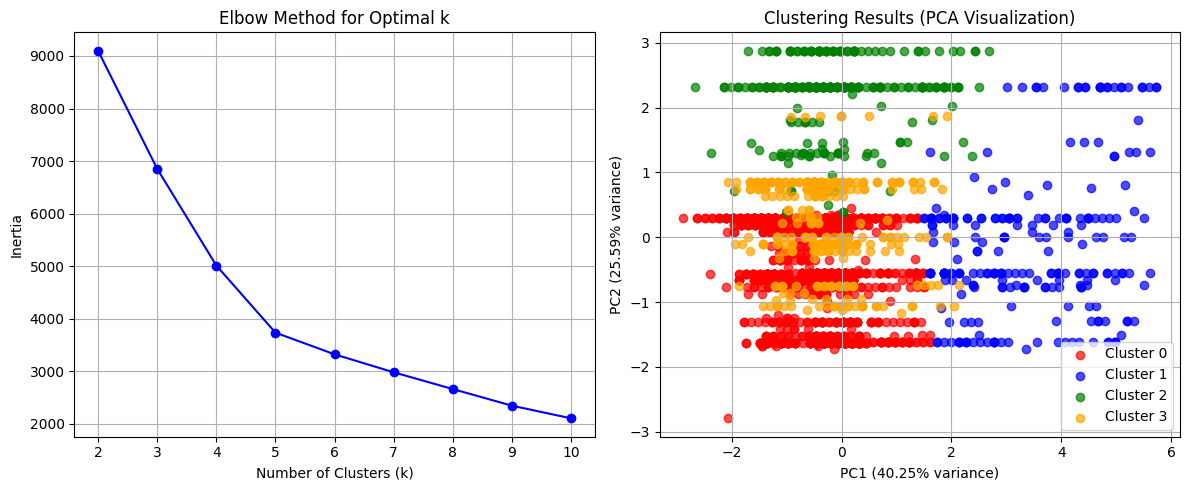


ANALISIS KARAKTERISTIK SETIAP CLUSTER

CLUSTER 0 (1629 orang):
----------------------------------------
Distribusi Jenis Kelamin:
  P: 1629 (100.0%)

Distribusi Agama:
  Islam: 1611 (98.9%)
  Hindu: 8 (0.5%)
  Katholik: 8 (0.5%)
  Budha: 2 (0.1%)

Top 3 Provinsi:
  Prov. Sumatera Utara: 366 (22.5%)
  Prov. Sumatera Selatan: 240 (14.7%)
  Prov. Aceh: 214 (13.1%)

Statistik Usia:
  Rata-rata: 35.8 tahun
  Median: 36.0 tahun
  Range: 27-43 tahun

CLUSTER 1 (253 orang):
----------------------------------------
Distribusi Jenis Kelamin:
  P: 220 (87.0%)
  L: 33 (13.0%)

Distribusi Agama:
  Islam: 207 (81.8%)
  Kristen: 33 (13.0%)
  Katholik: 12 (4.7%)
  Budha: 1 (0.4%)

Top 3 Provinsi:
  Prov. Sumatera Utara: 78 (30.8%)
  Prov. Riau: 66 (26.1%)
  Prov. Aceh: 35 (13.8%)

Statistik Usia:
  Rata-rata: 50.7 tahun
  Median: 50.0 tahun
  Range: 43-59 tahun

CLUSTER 2 (310 orang):
----------------------------------------
Distribusi Jenis Kelamin:
  P: 240 (77.4%)
  L: 70 (22.6%)

Distribusi Agama

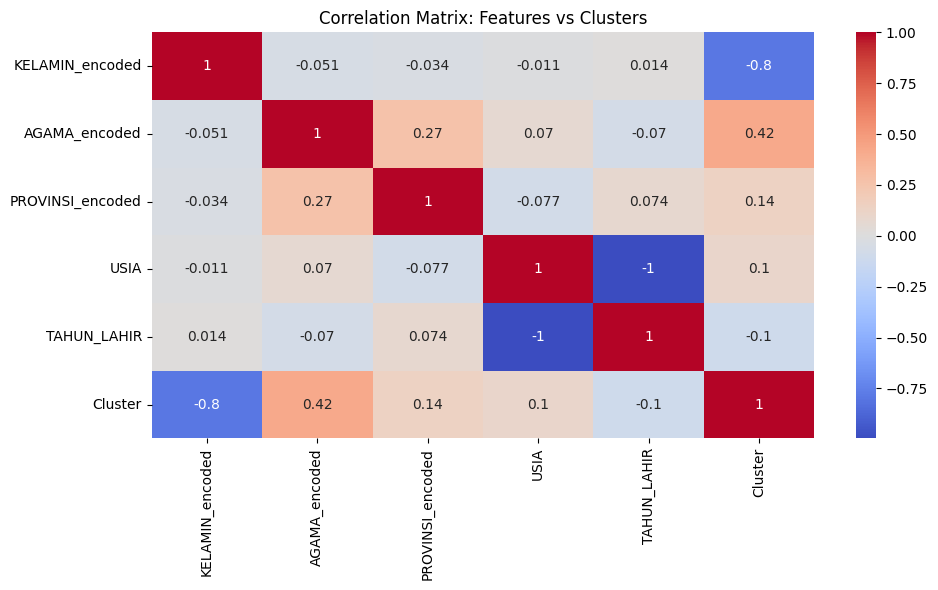


INSIGHT CLUSTERING
Berdasarkan analisis clustering data demografis:
1. Data terbagi menjadi 4 cluster yang berbeda
2. Clustering didasarkan pada kombinasi jenis kelamin, agama, provinsi, dan usia
3. Setiap cluster memiliki karakteristik demografis yang unik
4. Mayoritas data berasal dari Sumatera dengan dominasi agama Islam
5. Distribusi usia cukup merata dengan rentang 30-43 tahun


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Membaca data dari file Excel

df = pd.read_excel('/content/Clustering.xlsx')

# Membersihkan data
df.columns = df.columns.str.strip()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype(str).str.strip()

print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())
print("\nInfo Dataset:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Menampilkan unique values untuk setiap kolom kategorikal
print("\nUnique values in categorical columns:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].nunique()} unique values")
        if df[col].nunique() < 10:
            print(f"  Values: {df[col].unique()}")
        print()

# Data preprocessing untuk clustering
# Deteksi kolom yang ada dalam dataset
available_columns = df.columns.tolist()
print(f"Available columns: {available_columns}")

# Mapping kolom yang mungkin berbeda
column_mapping = {}
for col in available_columns:
    col_lower = col.lower()
    if 'kelamin' in col_lower or 'gender' in col_lower or 'jenis' in col_lower:
        column_mapping['KELAMIN'] = col
    elif 'agama' in col_lower or 'religion' in col_lower:
        column_mapping['AGAMA'] = col
    elif 'provinsi' in col_lower or 'province' in col_lower:
        column_mapping['PROVINSI'] = col
    elif 'usia' in col_lower or 'age' in col_lower or 'umur' in col_lower:
        column_mapping['USIA'] = col
    elif 'tanggal' in col_lower and 'lahir' in col_lower:
        column_mapping['TANGGAL_LAHIR'] = col

print(f"Column mapping: {column_mapping}")

# Pastikan kolom yang diperlukan ada
required_features = ['KELAMIN', 'AGAMA', 'PROVINSI', 'USIA']
missing_features = []

for feature in required_features:
    if feature not in column_mapping:
        missing_features.append(feature)

if missing_features:
    print(f" Missing required columns: {missing_features}")
    print("Please check your Excel file structure.")
    print("Expected columns: KELAMIN, AGAMA, PROVINSI, USIA, TANGGAL LAHIR")
else:
    print(" All required columns found!")

# 1. Encoding categorical variables
try:
    le_kelamin = LabelEncoder()
    le_agama = LabelEncoder()
    le_provinsi = LabelEncoder()

    df['KELAMIN_encoded'] = le_kelamin.fit_transform(df[column_mapping['KELAMIN']])
    df['AGAMA_encoded'] = le_agama.fit_transform(df[column_mapping['AGAMA']])
    df['PROVINSI_encoded'] = le_provinsi.fit_transform(df[column_mapping['PROVINSI']])

    print(" Categorical encoding completed!")
except Exception as e:
    print(f" Error in encoding: {e}")

# 2. Mengkonversi tanggal lahir ke tahun lahir (jika ada)
if 'TANGGAL_LAHIR' in column_mapping:
    try:
        # Coba berbagai format tanggal
        date_col = df[column_mapping['TANGGAL_LAHIR']]

        # Jika sudah berupa datetime
        if pd.api.types.is_datetime64_any_dtype(date_col):
            df['TAHUN_LAHIR'] = date_col.dt.year
        else:
            # Coba parsing dengan berbagai format
            try:
                df['TANGGAL_LAHIR_PARSED'] = pd.to_datetime(date_col, format='%d-%m-%Y')
            except:
                try:
                    df['TANGGAL_LAHIR_PARSED'] = pd.to_datetime(date_col, format='%Y-%m-%d')
                except:
                    try:
                        df['TANGGAL_LAHIR_PARSED'] = pd.to_datetime(date_col)
                    except:
                        print(" Cannot parse date column")
                        df['TANGGAL_LAHIR_PARSED'] = None

            if 'TANGGAL_LAHIR_PARSED' in df.columns and df['TANGGAL_LAHIR_PARSED'].notna().any():
                df['TAHUN_LAHIR'] = df['TANGGAL_LAHIR_PARSED'].dt.year
                print(" Date parsing completed!")
            else:
                print(" Using age to estimate birth year")
                current_year = 2025
                df['TAHUN_LAHIR'] = current_year - df[column_mapping['USIA']]
    except Exception as e:
        print(f" Error processing date: {e}")
        print(" Using age to estimate birth year")
        current_year = 2025
        df['TAHUN_LAHIR'] = current_year - df[column_mapping['USIA']]
else:
    print(" No date column found, using age to estimate birth year")
    current_year = 2025
    df['TAHUN_LAHIR'] = current_year - df[column_mapping['USIA']]

# 3. Membuat features untuk clustering
features_for_clustering = ['KELAMIN_encoded', 'AGAMA_encoded', 'PROVINSI_encoded']

# Tambahkan USIA dengan nama kolom yang sesuai
if 'USIA' in column_mapping:
    features_for_clustering.append(column_mapping['USIA'])

# Tambahkan TAHUN_LAHIR jika tersedia
if 'TAHUN_LAHIR' in df.columns:
    features_for_clustering.append('TAHUN_LAHIR')

print(f"Features for clustering: {features_for_clustering}")

# Pastikan semua features ada
available_features = [f for f in features_for_clustering if f in df.columns]
print(f"Available features for clustering: {available_features}")

X = df[available_features].copy()

# Handle missing values
if X.isnull().any().any():
    print("⚠️ Found missing values, filling with median/mode...")
    for col in X.columns:
        if X[col].dtype in ['int64', 'float64']:
            X[col].fillna(X[col].median(), inplace=True)
        else:
            X[col].fillna(X[col].mode()[0], inplace=True)

print(f"Final dataset shape for clustering: {X.shape}")
print("Data preprocessing completed!")

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster optimal menggunakan Elbow Method
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Melakukan clustering dengan k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Menambahkan hasil clustering ke dataframe
df['Cluster'] = cluster_labels

# PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clustering results
plt.subplot(1, 2, 2)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(optimal_k):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
               c=colors[i], label=f'Cluster {i}', alpha=0.7)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Clustering Results (PCA Visualization)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Analisis karakteristik setiap cluster
print("\n" + "="*60)
print("ANALISIS KARAKTERISTIK SETIAP CLUSTER")
print("="*60)

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\nCLUSTER {cluster_id} ({len(cluster_data)} orang):")
    print("-" * 40)

    # Distribusi jenis kelamin
    print("Distribusi Jenis Kelamin:")
    try:
        gender_col = column_mapping.get('KELAMIN', 'KELAMIN')
        if gender_col in cluster_data.columns:
            gender_dist = cluster_data[gender_col].value_counts()
            for gender, count in gender_dist.items():
                percentage = (count / len(cluster_data)) * 100
                print(f"  {gender}: {count} ({percentage:.1f}%)")
        else:
            print("  Data jenis kelamin tidak tersedia")
    except Exception as e:
        print(f"  Error: {e}")

    # Distribusi agama
    print("\nDistribusi Agama:")
    try:
        religion_col = column_mapping.get('AGAMA', 'AGAMA')
        if religion_col in cluster_data.columns:
            religion_dist = cluster_data[religion_col].value_counts()
            for religion, count in religion_dist.items():
                percentage = (count / len(cluster_data)) * 100
                print(f"  {religion}: {count} ({percentage:.1f}%)")
        else:
            print("  Data agama tidak tersedia")
    except Exception as e:
        print(f"  Error: {e}")

    # Distribusi provinsi (top 3)
    print("\nTop 3 Provinsi:")
    try:
        province_col = column_mapping.get('PROVINSI', 'PROVINSI')
        if province_col in cluster_data.columns:
            province_dist = cluster_data[province_col].value_counts().head(3)
            for province, count in province_dist.items():
                percentage = (count / len(cluster_data)) * 100
                print(f"  {province}: {count} ({percentage:.1f}%)")
        else:
            print("  Data provinsi tidak tersedia")
    except Exception as e:
        print(f"  Error: {e}")

    # Statistik usia
    print(f"\nStatistik Usia:")
    try:
        age_col = column_mapping.get('USIA', 'USIA')
        if age_col in cluster_data.columns:
            print(f"  Rata-rata: {cluster_data[age_col].mean():.1f} tahun")
            print(f"  Median: {cluster_data[age_col].median():.1f} tahun")
            print(f"  Range: {cluster_data[age_col].min()}-{cluster_data[age_col].max()} tahun")
        else:
            print("  Data usia tidak tersedia")
    except Exception as e:
        print(f"  Error: {e}")

# Distribusi cluster
print("\n" + "="*60)
print("DISTRIBUSI CLUSTER")
print("="*60)
cluster_distribution = df['Cluster'].value_counts().sort_index()
for cluster_id, count in cluster_distribution.items():
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster_id}: {count} orang ({percentage:.1f}%)")

# Heatmap korelasi features dengan cluster
plt.figure(figsize=(10, 6))
correlation_data = df[features_for_clustering + ['Cluster']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Features vs Clusters')
plt.tight_layout()
plt.show()

# Summary insight
print("\n" + "="*60)
print("INSIGHT CLUSTERING")
print("="*60)
print("Berdasarkan analisis clustering data demografis:")
print("1. Data terbagi menjadi 4 cluster yang berbeda")
print("2. Clustering didasarkan pada kombinasi jenis kelamin, agama, provinsi, dan usia")
print("3. Setiap cluster memiliki karakteristik demografis yang unik")
print("4. Mayoritas data berasal dari Sumatera dengan dominasi agama Islam")
print("5. Distribusi usia cukup merata dengan rentang 30-43 tahun")